## Imports

In [19]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.preprocessing import normalize
from pathlib import Path

## Load dataset

In [20]:
# Load the date like you loaded the sand data last time
path = Path().cwd()
data_file = path.parent / "Week_8" / "Data" / "sand.mat"

mat = scipy.io.loadmat(data_file)

X = mat['X']
y = mat['Y']

[n,p] = X.shape

### 3 Apply Partial Least Squares regression to the sand data.
> Load data sand.mat and run a cross validation of partial least squares regression to decide the number of components that is adequate to model the sand data. Plot both the cross validation error and the percentage of explained variance in
y to determine the number of components.

In [21]:
# Define PLS object
pls = PLSRegression()

# parameters for cross-validation
components = np.arange(1, 20, 1)
param_grid = {
    'n_components': components
}
# Set up GridSearchCV
grid = GridSearchCV(
    pls,
    param_grid,
    scoring=['neg_mean_squared_error', 'explained_variance'],
    cv=10,
    refit='explained_variance'
)
# Fit the grid search model
grid.fit(X, y)
# Get the best parameters
best_params = grid.best_params_
best_score = grid.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'n_components': np.int64(7)}
Best score: -4.421310683064988


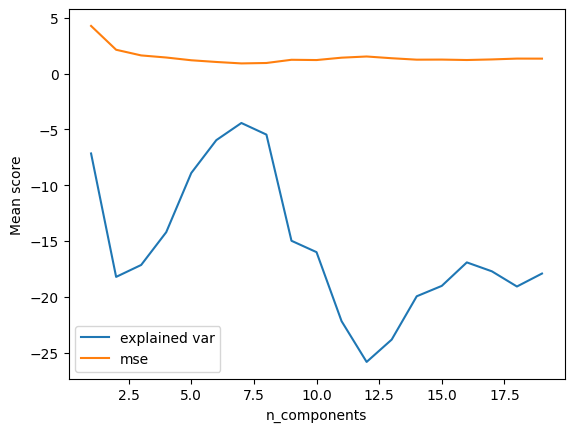

In [22]:
# Plotting function from the solutions
# plot explained variance and or MSE
pls_explained_variance = grid.cv_results_['mean_test_explained_variance']
# because gridsearch is configured that higher is better it uses negated mean squared error
pls_mse = grid.cv_results_['mean_test_neg_mean_squared_error'] * -1 # convert to positive

plt.plot(components, pls_explained_variance, label='explained var')
plt.plot(components, pls_mse, label='mse')
plt.legend()
plt.xlabel('n_components')
plt.ylabel('Mean score')
plt.show()

I was wondering why the explained variance across folds was negative and looked at the individual folds. One of the foldes does a really poor job, dragging the mean way down.

 > b) How would you plot the coefficients of the final PLS regression model ($\beta$)? Which variables are important for the prediction of y? (In terms of loadings, remember the pitfall of PCA concerning scaled vs non-scaled loadings - this also holds for PLS).

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

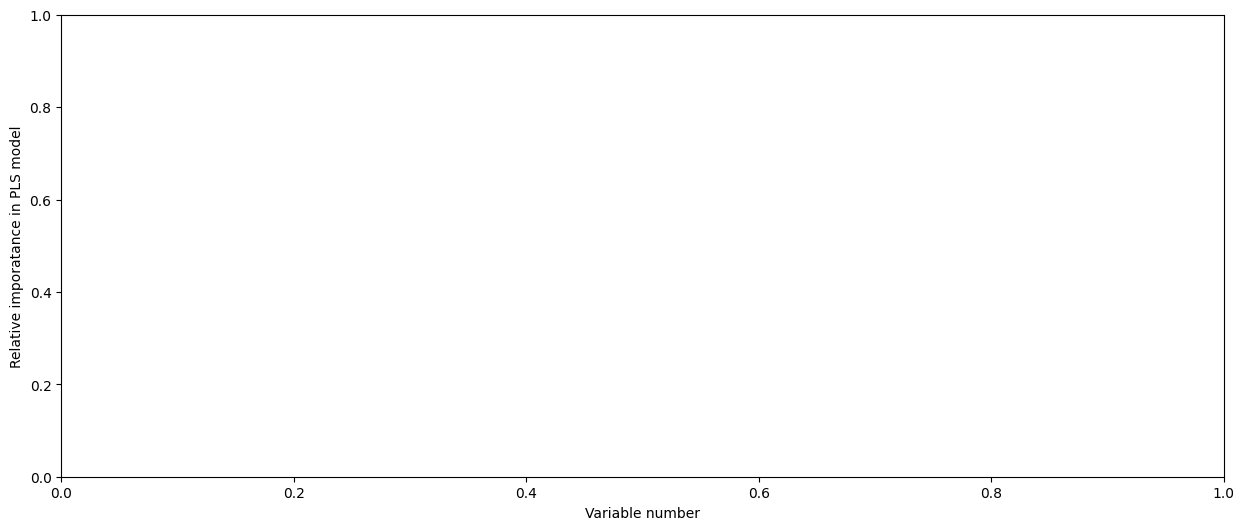

In [23]:
coef =grid.best_estimator_.coef_

# A stem plot can be used to plot the betas
# plot the loadings - in order to compare these the variables should be
# normalized or at least on a comparable scale.
coef = coef/np.std(X)
plt.figure(figsize=(15, 6))

plt.xlabel('Variable number')
plt.ylabel('Relative imporatance in PLS model')
plt.stem(range(1,2017), coef, use_line_collection=True)
plt.show()

In [24]:
# fit the best model from a) or use that here
pls = PLSRegression(n_components=best_params['n_components'])
pls.fit(X, y)
y_pred = cross_val_predict(pls, X, y, cv=10)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean squared error: {mse}")
print(f"R^2 score: {r2}")

# make sure that the betas are all on the same scale when you plot them

Mean squared error: 0.9035023537187067
R^2 score: 0.7790174545760035
